# Práctica Final: Clasificación con Scikit-learn y MLflow

En esta práctica, utilizarás un conjunto de datos de Scikit-learn para entrenar un modelo de clasificación.

Pasos a seguir: 

    Exploración de Datos: Analiza el conjunto de datos proporcionado para comprender su estructura y contenido.

    Preprocesamiento de Texto: Realiza tareas de preprocesamiento de texto, como tokenización y vectorización, para preparar los datos para el modelado.

    Entrenamiento del Modelo: Utiliza algoritmos de clasificación de Scikit-learn para entrenar un modelo con los datos preprocesados.

    Evaluación del Modelo: Evalúa el rendimiento del modelo utilizando métricas de evaluación estándar como precisión y recall.

    Registro de Métricas con MLflow: Utiliza MLflow para registrar métricas y hiperparámetros durante el entrenamiento, facilitando la gestión y comparación de experimentos.


Nota: Dado que no voy a poder tener acceso a vuestros logs de MLFlow añadirme las imagenes de la interfaz de MLFlow en el notebook

# 1. Exploracion de Datos:

### Descripción del Dataset

Para empezar, cargaremos los datos que seran de un dataset de Kaggle que trata sobre la Salud de diferentes pacientes, cada columna del dataset proporciona información específica sobre los pacientes, su admisión y los servicios de salud recibidos, por ello, se describe brevemente cada columna:

- **Nombre(Name)**: Nombre del paciente asociado al registro médico.  
- **Edad(Age)**: Edad del paciente, en años.  
- **Género(Gender)**: Género del paciente.  
- **Tipo de Sangre(Blood Type)**: Grupo sanguíneo del paciente ("A+", "O-", etc.).  
- **Condición Médica(Mdedical Condition)**: Diagnóstico principal del paciente, como "Diabetes", "Hipertensión", "Asma", entre otros.  
- **Fecha de Admisión(Date of Admission)**: Fecha en la que fue admitido en el centro de salud.  
- **Doctor**: Nombre del médico responsable durante su admisión.  
- **Hospital**: Centro de salud donde fue admitido el paciente.  
- **Proveedor de Seguro(Insurance Provider)**: Compañía de seguros del paciente.  
- **Monto Facturado(Billing Amount)**: Dinero facturado por los servicios médicos.  
- **Número de Habitación(Room Number)**: Número de la habitación del paciente.  
- **Tipo de Admisión(Admission Type)**: Puede ser "Emergencia", "Electiva" o "Urgente".  
- **Fecha de Alta(Discharge Date)**: Fecha en que fue dado de alta del hospital.  
- **Medicación(Medication)**: Medicamentos recetados o administrados al paciente.  
- **Resultados de Pruebas(Test Results)**: Resultados de pruebas médicas, que pueden ser "Normal", "Anormal" o "Inconcluso".  

In [1]:
import pandas as pd

df = pd.read_csv(r"\Users\Santiago\Desktop\KeepCoding\Entrega Practicas\Entrega-Practica-Despliegue-Algoritmos\healthcare_dataset.csv")
print(df.head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [2]:
df.shape

(55500, 15)

In [3]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [4]:
# Obtener los valores únicos de la columna 'Medical Condition' y la columna 'Test Result'
valores_unicos = df['Medical Condition'].unique()
conteo_valores_unicos = df['Medical Condition'].value_counts()
valores_unicos2 = df['Test Results'].unique()
conteo_valores_unicos2 = df['Test Results'].value_counts()

# Mostrar tamaño de valores únicos
print(valores_unicos.shape)
print(conteo_valores_unicos)

# Mostrar tamaño de valores únicos
print(valores_unicos2.shape)
print(conteo_valores_unicos2)

(6,)
Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64
(3,)
Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64


In [5]:
def conteo_edad(df, columna_puntuacion):

    # Contar reseñas positivas y negativas
    mayor = df[df[columna_puntuacion] >= 18].shape[0]
    menor = df[df[columna_puntuacion] < 18].shape[0]

    # Devolver el resultado en un diccionario
    return {'Positivas': mayor, 'Negativas': menor}


# Contar reseñas positivas y negativas
conteo = conteo_edad(df, columna_puntuacion = 'Age')

# Mostrar el resultado
print("Mayores de 18 años:", conteo['Positivas'])
print("Menores de 18 años:", conteo['Negativas'])

Mayores de 18 años: 55384
Menores de 18 años: 116


C:\Users\Santiago\AppData\Local\Temp\ipykernel_8052\1083687036.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_distribution.index, y=age_distribution.values, palette='viridis')


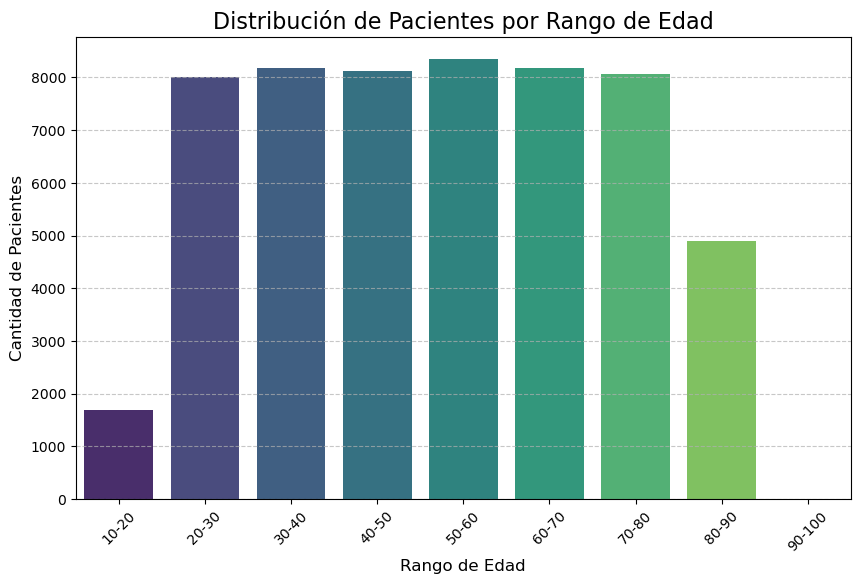

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes un DataFrame llamado df con una columna 'Age'
# Si no, puedes cargar tu dataset así:
# df = pd.read_csv('ruta/al/archivo.csv')

# Crear rangos de edad
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Define los rangos que desees
labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Agrupar las edades en rangos
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Contar la cantidad de pacientes en cada rango de edad
age_distribution = df['Age Group'].value_counts().sort_index()

# Crear la gráfica de distribución
plt.figure(figsize=(10, 6))
sns.barplot(x=age_distribution.index, y=age_distribution.values, palette='viridis')
plt.title('Distribución de Pacientes por Rango de Edad', fontsize=16)
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Cantidad de Pacientes', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
df.head

<bound method NDFrame.head of                     Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith             

#### Conclusion: 

El dataset contiene información de pacientes, con columnas como Age, Gender, Blood Type, Medical Condition, Test Results, entre otras. Los tipos de datos incluyen variables numéricas (edad, monto facturado), categóricas (género, tipo de sangre) y fechas (fecha de admisión). El objetivo es desarrollar un modelo predictivo que analice las condiciones médicas (como diabetes, hipertensión, etc.) y los resultados de pruebas (normal, anormal, inconcluso) para identificar patrones y apoyar la toma de decisiones en el ámbito de la salud.

# 2. Preprocesamiento de Texto:

Los algoritmos de machine learning solo procesan datos numéricos, por lo que las variables categóricas (como Gender o Blood Type) deben convertirse en números. Utilizaremos One-Hot Encoding para crear columnas binarias (0 o 1) por cada categoría, evitando que el modelo interprete un orden inexistente. Esto asegura que la información categórica sea interpretada de forma adecuada, mejorando la precisión del modelo.

In [8]:
import pandas as pd

# One-Hot Encoding para columnas categóricas nominales
df_encoded = pd.get_dummies(df, columns=['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results'])


Las columnas con valores numéricos (Age, Billing Amount, Room Number) pueden tener escalas muy diferentes. Entonces, normalizaremos los valores dentro del dataset.

In [9]:
from sklearn.preprocessing import StandardScaler

# Normalizar columnas numéricas
scaler = StandardScaler()
df[['Age', 'Billing Amount', 'Room Number']] = scaler.fit_transform(df[['Age', 'Billing Amount', 'Room Number']])

Elimino algunas columnas que considero no son relevantes para el enfoque de mi análisis previo a ejecutar mi modelo

In [10]:
df = df.drop(columns=['Name', 'Doctor', 'Hospital','Date of Admission','Discharge Date','Insurance Provider','Age Group'])

Reviso como quedo mi modelo previo a su uso

In [11]:
df.shape


(55500, 9)

In [12]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Medication,Test Results
0,-1.098824,Male,B-,Cancer,-0.470261,0.233120,Urgent,Paracetamol,Normal
1,0.533639,Male,A+,Obesity,0.570250,-0.313556,Emergency,Ibuprofen,Inconclusive
2,1.247842,Female,A-,Obesity,0.169990,-0.834199,Emergency,Aspirin,Normal
3,-1.200853,Female,O+,Diabetes,0.870465,1.291761,Elective,Ibuprofen,Abnormal
4,-0.435636,Female,AB+,Cancer,-0.795211,1.361180,Urgent,Penicillin,Abnormal


# 3. Entrenamiento del Modelo:

En este caso, utilizaremos el modelo de regresion logistica para el entrenamiento del modelo, ademas utilizaremos cross validation y verificaremos los resultados en el reporte de clasificacion:

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Separar X e y correctamente
X = df[['Admission Type', 'Medical Condition', 'Medication']]
y = df['Test Results']  # Variable objetivo

# Codificar la variable objetivo (y) usando LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Aplicar One-Hot Encoding a las columnas categóricas de X
X_encoded = pd.get_dummies(X, columns=['Admission Type', 'Medical Condition', 'Medication'])

# Dividir el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Crear el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
print("Precisión:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Cross-Validation
cv_scores = cross_val_score(model, X_encoded, y_encoded, cv=5, scoring='accuracy')
print("\nPrecisión promedio con Cross-Validation:", cv_scores.mean())
print("Desviación estándar:", cv_scores.std())

Precisión: 0.338018018018018

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.34      0.63      0.44      3754
           1       0.31      0.11      0.16      3617
           2       0.35      0.26      0.30      3729

    accuracy                           0.34     11100
   macro avg       0.33      0.34      0.30     11100
weighted avg       0.33      0.34      0.30     11100


Matriz de confusión:
[[2363  468  923]
 [2281  406  930]
 [2311  435  983]]

Precisión promedio con Cross-Validation: 0.335063063063063
Desviación estándar: 0.0036311559318637976


# 4. Registro de Metricas con ML Flow

In [33]:
pip install mlflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [46]:
import mlflow
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar el experimento
mlflow.set_experiment("My_Medical_Classification_Experiment")

# Iniciar una nueva corrida
mlflow.start_run()

try:
    # Registrar parámetros
    mlflow.log_param("test_size", 0.2)
    mlflow.log_param("random_state", 42)
    mlflow.log_param("max_iter", 1000)
    mlflow.log_param("cv_folds", 5)

    # ... (trabajo previo para entrenar el modelo y obtener y_pred, y_test, etc.)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics = {
        "accuracy": accuracy,
        "recall": report["weighted avg"]["recall"],
        "f1_score": report["weighted avg"]["f1-score"]
    }

    # Registrar métricas
    mlflow.log_metrics(metrics)

    # Validación Cruzada
    cv_scores = cross_val_score(model, X_encoded, y_encoded, cv=5, scoring='accuracy')
    mlflow.log_metrics({
        "cv_mean_accuracy": cv_scores.mean(),
        "cv_std_accuracy": cv_scores.std()
    })

    # Registrar el modelo
    mlflow.sklearn.log_model(
        model,
        "model",
        serialization_format=mlflow.sklearn.SERIALIZATION_FORMAT_PICKLE
    )

finally:
    # Finalizar la corrida
    mlflow.end_run()

2025/02/24 03:41:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


## Generar .py de funciones y main con al menos dos argumentos de entrada.

In [78]:
%%writefile funciones_practica.py

# functions.py
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import mlflow
import mlflow.sklearn

def load_data(filepath: str) -> pd.DataFrame:
    """Carga los datos desde un archivo CSV."""
    return pd.read_csv(filepath)

def preprocess_data(df: pd.DataFrame) -> tuple:
    """Realiza el procesamiento de datos incluyendo One-Hot Encoding y Label Encoding."""
    X = df[['Admission Type', 'Medical Condition', 'Medication']]
    y = df['Test Results']

    # Codificación de variables categóricas
    categorical_cols = ['Admission Type', 'Medical Condition', 'Medication']
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), categorical_cols)
        ],
        remainder='passthrough'
    )
    X_encoded = preprocessor.fit_transform(X)

    # Codificar variable objetivo
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    return X_encoded, y_encoded

def train_model(X_train, y_train) -> LogisticRegression:
    """Entrena un modelo de Regresión Logística."""
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test) -> dict:
    """Evalúa el modelo y devuelve un diccionario con las métricas."""
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    metrics = {
        "accuracy": accuracy,
        "recall": report["weighted avg"]["recall"],
        "f1_score": report["weighted avg"]["f1-score"]
    }

    return metrics

def log_model(model, metrics, X_encoded, y_encoded) -> None:
    """Registra el modelo y sus métricas en MLflow."""
    # Inicializar el experimento
    mlflow.set_experiment("Medical_Classifier_Experiment")

    try:
        # Iniciar una nueva corrida
        mlflow.start_run()
        
        max_iter_values = 2000
        cv_folds_values = 10
        
        # Registrar parámetros
        mlflow.log_param("test_size", 0.2)
        mlflow.log_param("random_state", 42)
        mlflow.log_param("max_iter", max_iter_values)
        mlflow.log_param("cv_folds", cv_folds_values)

        # Registrar métricas
        mlflow.log_metrics(metrics)

        # Validación Cruzada
        cv_scores = cross_val_score(model, X_encoded, y_encoded, cv=5, scoring='accuracy')
        mlflow.log_metrics({
            "cv_mean_accuracy": cv_scores.mean(),
            "cv_std_accuracy": cv_scores.std()
        })

        # Registrar el modelo
        mlflow.sklearn.log_model(
            model,
            "model",
            serialization_format=mlflow.sklearn.SERIALIZATION_FORMAT_PICKLE
        )

    finally:
        # Finalizar la corrida
        mlflow.end_run()

Overwriting funciones_practica.py


In [73]:
%%writefile main.py

# main.py
from funciones_practica import load_data, preprocess_data, train_model, evaluate_model, log_model
import argparse
from sklearn.model_selection import train_test_split


def main():
    # Parsear argumentos
    parser = argparse.ArgumentParser(description='Entrenar modelo de clasificación médica.')
    parser.add_argument('--data_path', type=str, default=r"C:\Users\Santiago\Desktop\KeepCoding\Entrega Practicas\Entrega-Practica-Despliegue-Algoritmos\healthcare_dataset.csv",
                       help='Ruta al archivo CSV que contiene los datos.')
    args = parser.parse_args()

    # Cargar los datos
    df = load_data(args.data_path)

    # Preprocesar datos
    X_encoded, y_encoded = preprocess_data(df)

    # Dividir en train y test
    X_train, X_test, y_train, y_test = train_test_split(
        X_encoded, y_encoded, test_size=0.2, random_state=42
    )

    # Entrenar el modelo
    model = train_model(X_train, y_train)

    # Evaluar el modelo
    metrics = evaluate_model(model, X_test, y_test)

    # Visualizar métricas
    print("Precisión:", metrics["accuracy"])
    print("F1 Score:", metrics["f1_score"])

    # Registrar modelo y métricas en MLflow
    log_model(model, metrics, X_encoded, y_encoded)

if __name__ == "__main__":
    main()

Overwriting main.py


In [79]:
!python main.py

Precisión: 0.338018018018018
F1 Score: 0.3035692392722252


2025/02/24 04:18:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


## Práctica parte FastAPI

### Para esta parte de la práctica teneis que generar un script con al menos 5 modulos app.get y dos de ellos tienen que ser pipelines de HF. 

### Parte de la practica se tendra que entregar en capturas de pantalla. Las capturas de pantalla a adjuntas son las siguientes. 

### 1. Captura de la pantalla docs con al menos 5 modulos. 
### 2. Captura de cada una de los modulos con la respuesta dentro de docs. 
### 3. Captura de cada uno de los modulos en la llamada https.
### 4. Todo el codigo usado durante el proceso. Notebooks y scripts.

### Opcional

### 5. Despliegue del script en GCP Cloud Run

In [4]:
%%writefile mainfast.py
from fastapi import FastAPI
from pydantic import BaseModel
from transformers import pipeline

# Inicializar la aplicación FastAPI
app = FastAPI()

# Definir modelos de datos
class TextInput(BaseModel):
    text: str

# Endpoint 1: Contar palabras (POST)
@app.post("/contar_palabras")
def contar_palabras(input: TextInput):
    num_palabras = len(input.text.split())
    return {"texto": input.text, "num_palabras": num_palabras}

# Endpoint 2: Calcular factorial (GET)
@app.get("/factorial")
def factorial(n: int):
    def calcular_factorial(x):
        if x == 0 or x == 1:
            return 1
        return x * calcular_factorial(x - 1)
    
    resultado = calcular_factorial(n)
    return {"numero": n, "factorial": resultado}

# Endpoint 3: Pipeline de análisis de sentimientos (POST) - Usando DistilBERT
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased")

@app.post("/analizar_sentimiento")
def analizar_sentimiento(input: TextInput):
    resultado = sentiment_pipeline(input.text)
    return {"texto": input.text, "sentimiento": resultado}

# Endpoint 4: Pipeline de generación de texto (POST) - Usando T5-small
text_generator = pipeline("text2text-generation", model="t5-small")

@app.post("/generar_texto")
def generar_texto(input: TextInput, max_length: int = 50):
    resultado = text_generator(input.text, max_length=max_length)
    return {"prompt": input.text, "texto_generado": resultado[0]['generated_text']}

# Endpoint 5: Pipeline de traducción de texto (POST) - Usando T5-small
translator = pipeline("translation_en_to_es", model="t5-small")

@app.post("/traducir")
def traducir(input: TextInput):
    resultado = translator(input.text)
    return {"texto_original": input.text, "traduccion": resultado[0]['translation_text']}



Overwriting mainfast.py


In [5]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached fastapi-0.95.2-py3-none-any.whl.metadata (24 kB)
  Using cached uvicorn-0.22.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached transformers-4.30.0-py3-none-any.whl.metadata (113 kB)
  Using cached torch-2.5.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached huggingface_hub-0.29.1-py3-none-any.whl.metadata (13 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached safetensors-0.5.2-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   ------- -------------------------------- 1

  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [49 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-312\tokenizers
      copying py_src\tokenizers\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers
      creating build\lib.win-amd64-cpython-312\tokenizers\models
      copying py_src\tokenizers\models\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers\models
      creating build\lib.win-amd64-cpython-312\tokenizers\decoders
      copying py_src\tokenizers\decoders\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers\decoders
      creating build\lib.win-amd64-cpython-312\tokenizers\normalizers
      copying py_src\tokenizers\normalizers\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers\normalizers
      creating build\lib.win-amd64-cpython-312\tokenizers\pre_tokenizers
      copying py_src